In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/kshitij/Desktop/weather_data.csv')

In [3]:
dimension=df.shape

In [4]:
dimension


(1000000, 6)

In [5]:
structure=df.info()
structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [6]:
summary=df.describe()
summary

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


In [8]:
df.replace('?',pd.NA,inplace=True)
df.replace('na',pd.NA,inplace=True)

for column in df.columns:
    df[column]=pd.to_numeric(df[column],errors='coerce')
missing_values=df.isnull().sum()
df.fillna(df.mean(),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

missing_values_after=df.isnull().sum()
missing_values,missing_values_after

(Location            1000000
 Date_Time           1000000
 Temperature_C             0
 Humidity_pct              0
 Precipitation_mm          0
 Wind_Speed_kmh            0
 dtype: int64,
 Location            1000000
 Date_Time           1000000
 Temperature_C             0
 Humidity_pct              0
 Precipitation_mm          0
 Wind_Speed_kmh            0
 dtype: int64)

In [15]:
continuous_columns=['Temperature_C','Humidity_pct']
print(continuous_columns)

['Temperature_C', 'Humidity_pct']


C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


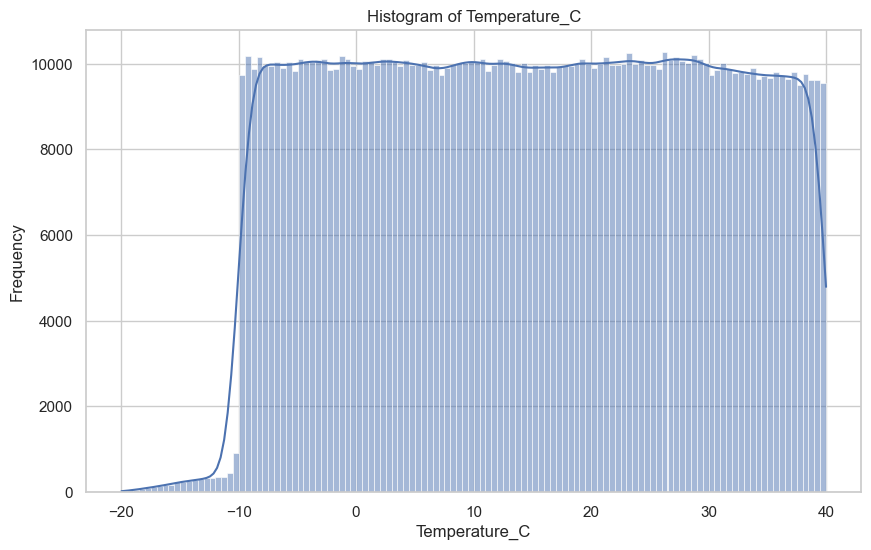

C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


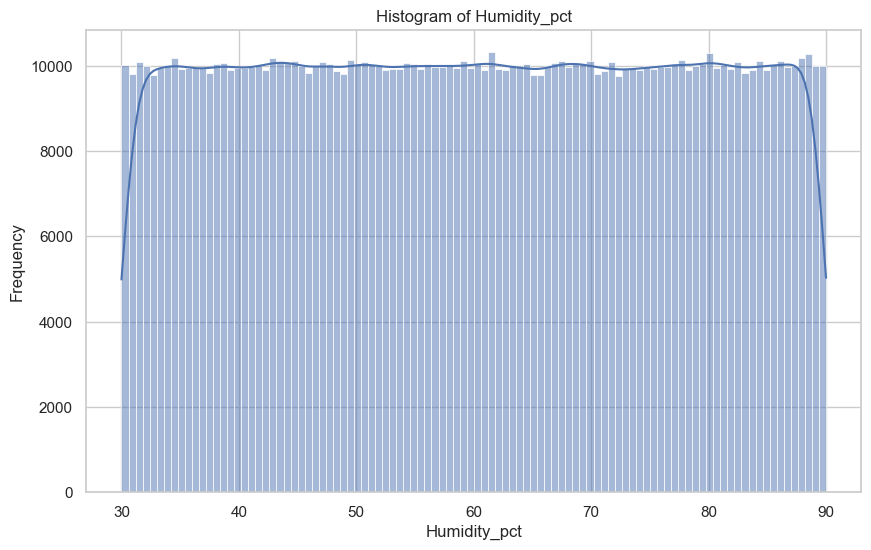

In [16]:
sns.set(style="whitegrid")
for column in continuous_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

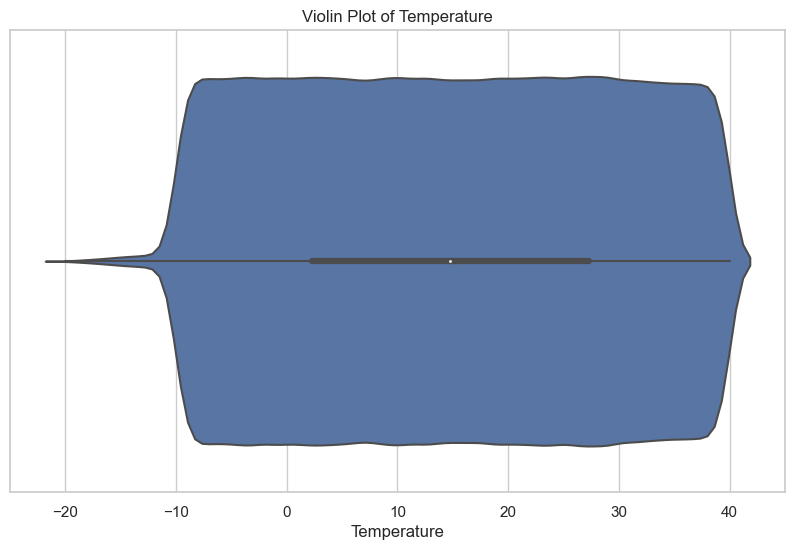

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['Temperature_C'])
plt.title('Violin Plot of Temperature')
plt.xlabel('Temperature')
plt.show()

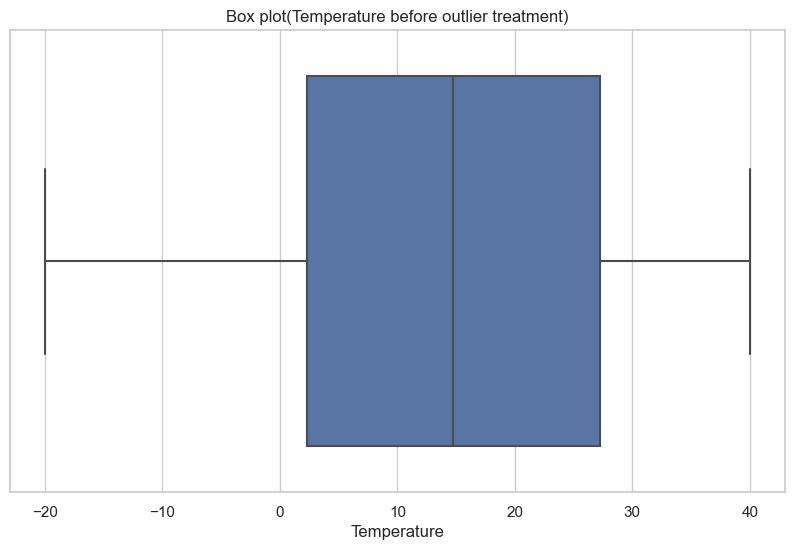

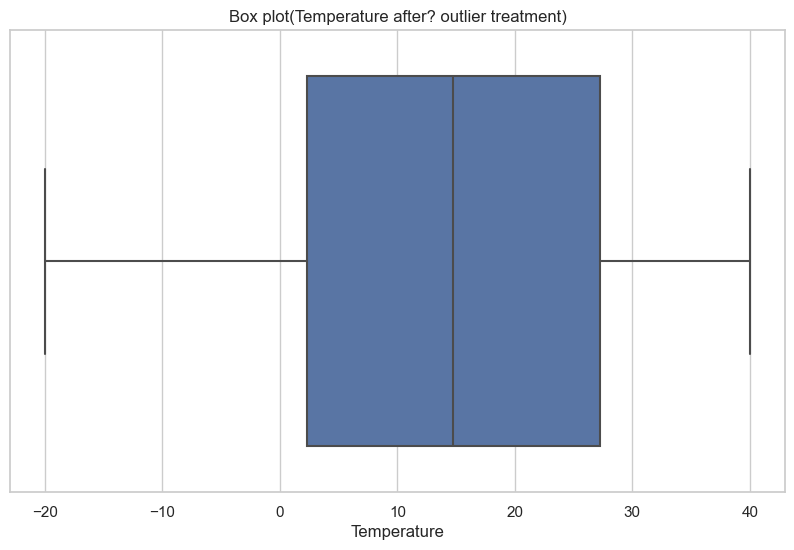

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Temperature_C'])
plt.title('Box plot(Temperature before outlier treatment)')
plt.xlabel('Temperature')
plt.show()

Q1=df['Temperature_C'].quantile(0.25)
Q3=df['Temperature_C'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Temperature_C']=df['Temperature_C'].clip(lower_bound,upper_bound)

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Temperature_C'])
plt.title('Box plot(Temperature after? outlier treatment)')
plt.xlabel('Temperature')
plt.show()


C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


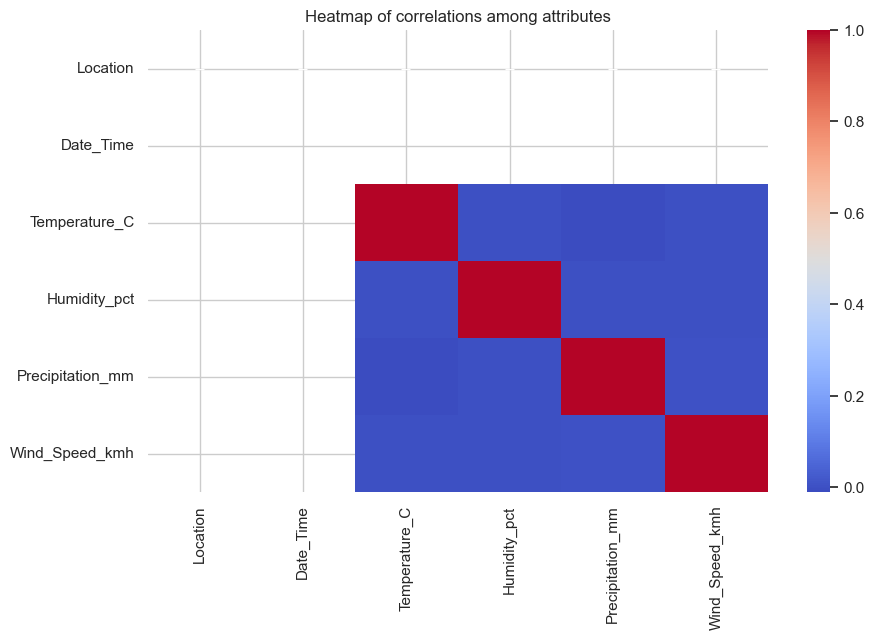

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap of correlations among attributes')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
continous_vars=df.select_dtypes(include=['float64','int64']).columns
scaler=StandardScaler()
df[continous_vars]=scaler.fit_transform(df[continous_vars])
df.head()

C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,NaN,NaN,-0.282872,-1.086704,-0.369580,-0.780749
1,NaN,NaN,-0.417438,-0.098287,1.357527,1.467939
2,NaN,NaN,-0.217315,-1.223830,-0.170329,1.585418
3,NaN,NaN,-1.616337,-0.343301,-0.653298,1.312361
4,NaN,NaN,1.728184,0.743366,1.522608,1.719967


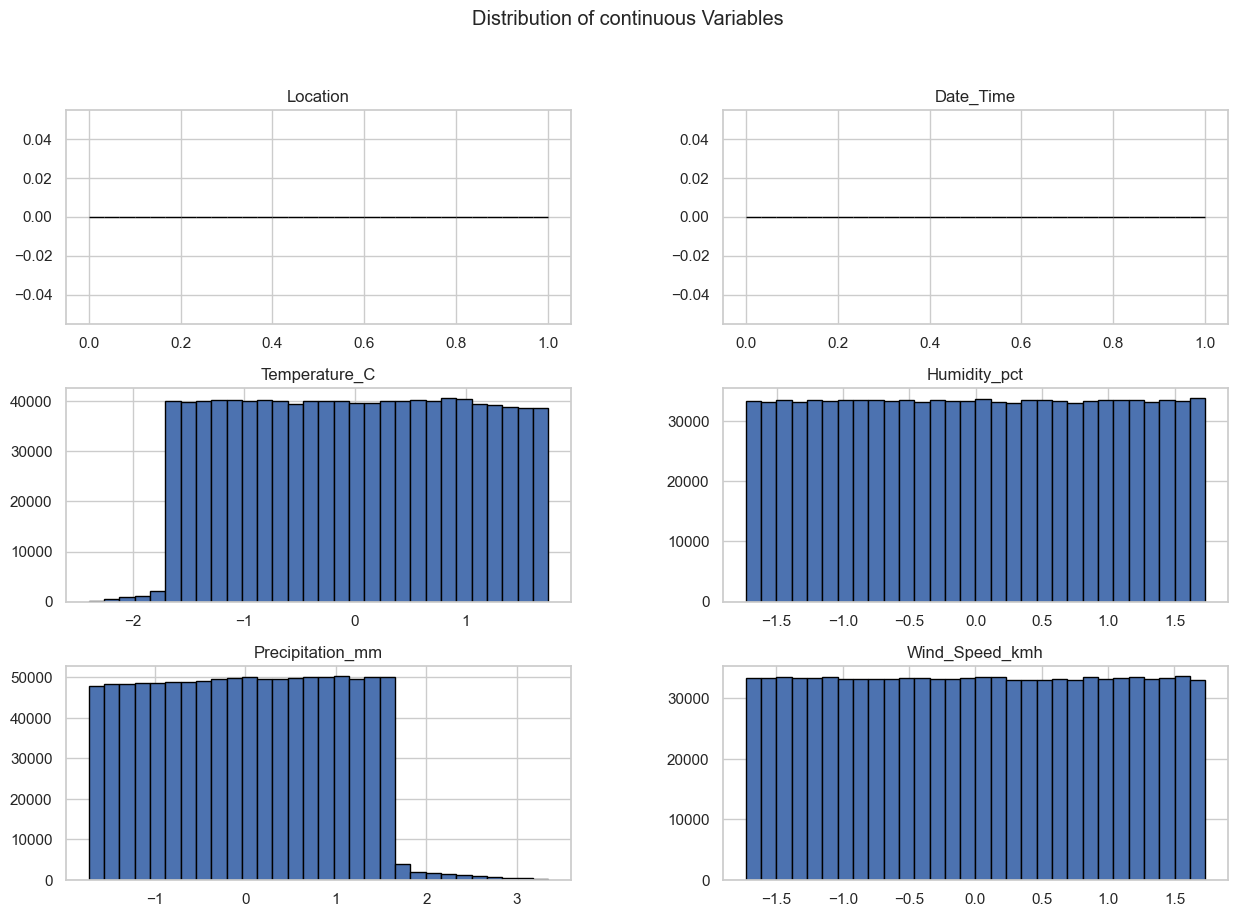

In [31]:
numeric_df=df.select_dtypes(include=['float64','int64'])
numeric_df.hist(bins=30,figsize=(15,10),edgecolor='black')
plt.suptitle('Distribution of continuous Variables')
plt.show()

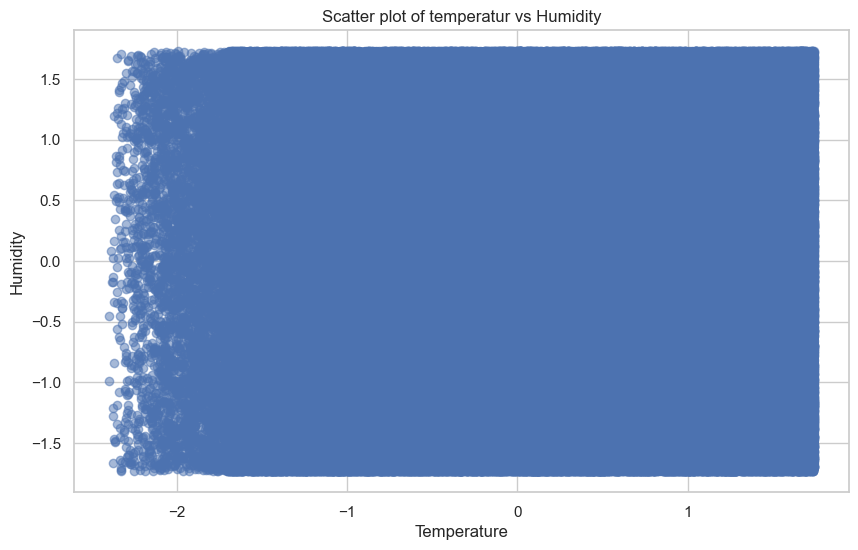

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(df['Temperature_C'],df['Humidity_pct'],alpha=0.5)
plt.title('Scatter plot of temperatur vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()